In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import tensorflow_datasets as tfds
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
# Helper libraries
import numpy as np
import matplotlib.pyplot as pl
import cv2

In [6]:
data, val_data = tfds.load('horses_or_humans', split=['train', 'test'], as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]
Dl Size...:  23%|███████████████▍                                                   | 35/152 [00:11<00:43,  2.68 MiB/s]


Dl Size...:  45%|█████████████████████████████▉                                     | 68/152 [00:23<00:31,  2.63 MiB/s]


Dl Size...:  66%|███████████████████████████████████████████▊                      | 101/152 [00:36<00:21,  2.37 MiB/s]


Dl Size...:  88%|██████████████████████████████████████████████████████████▏       | 134/152 [00:48<00:06,  2.71 MiB/s]


Generating splits...:   0%|                                                                 | 0/2 [00:00<?, ? splits/s]
Generating train examples...: 0 examples [00:00, ? examples/s]
Generating train examples...: 81 examples [00:00, 805.08 examples/s]
Generating train examples...: 227 examples [00:00, 1184.32 examples/s]
Generating train examples...: 395 examples [00:00, 1405.14 examples/s]
Generating train examples...: 560 examples [00:00, 1497.08 examples/s]
Generating train examples...: 729 examples [00:00, 1562.45 examples/s]
Generating train examples...: 886 examples [00:00, 1426.50 examples/s]
                                                                      
Shuffling C:\Users\Nicolas\tensorflow_datasets\horses_or_humans\3.0.0.incompleteTS8MYT\horses_or_humans-train.tfrecord*
Shuffling C:\Users\Nicolas\tensorflow_datasets\horses_or_humans\3.0.0.incompleteTS8MYT\horses_or_humans-train.tfrecord*
Shuffling C:\Users\Nicolas\tensorflow_datasets\horses_or_humans\3.0.0.incompleteTS

Dataset horses_or_humans downloaded and prepared to C:\Users\Nicolas\tensorflow_datasets\horses_or_humans\3.0.0. Subsequent calls will reuse this data.


In [8]:
train_batches = data.shuffle(100).batch(32)
validation_batches = val_data.batch(32)

In [9]:
model = tf.keras.models.Sequential([
      layers.Conv2D(32, (3,3), activation='relu',
                               input_shape=(300,300,3)),
      layers.MaxPooling2D(2, 2),                   
      layers.Conv2D(64, (3,3), activation='relu'),
      layers.MaxPooling2D(2, 2),
      layers.Conv2D(128, (3,3), activation='relu'),
      layers.MaxPooling2D(2, 2),
      layers.Conv2D(128, (3,3), activation='relu'),
      layers.MaxPooling2D(2, 2),
      layers.Conv2D(128, (3,3), activation='relu'),
      layers.MaxPooling2D(2, 2),
      layers.Flatten(),
      layers.Dense(1024, activation='relu'),
      layers.Dense(1, activation='sigmoid')

])

In [10]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
epoch_history = model.fit(train_batch~;es, epochs=3,
                    validation_data=validation_batches)

Epoch 1/3
33/33 [==============================] - 253s 6s/step - loss: 11.2082 - accuracy: 0.6865 - val_loss: 0.9737 - val_accuracy: 0.8555
Epoch 2/3
33/33 [==============================] - 97s 3s/step - loss: 0.1590 - accuracy: 0.9464 - val_loss: 0.6554 - val_accuracy: 0.9102
Epoch 3/3
33/33 [==============================] - 106s 3s/step - loss: 0.1621 - accuracy: 0.9445 - val_loss: 2.4990 - val_accuracy: 0.8086


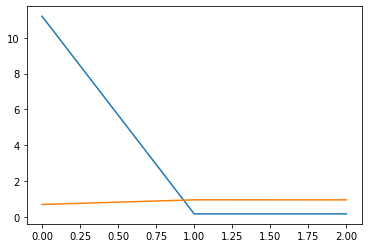

In [13]:
import pandas as pd

history_df = pd.DataFrame(epoch_history.history)

history_df['loss'].plot();
history_df['accuracy'].plot();

In [14]:
train_loss, train_acc = model.evaluate(train_batches)
test_loss, test_acc = model.evaluate(validation_batches)

8/8 [==============================] - 5s 562ms/step - loss: 2.4990 - accuracy: 0.8086


In [15]:
predictions = model.predict(validation_batches)

In [16]:
class_names = ['Horse','Human']

In [17]:
test_ds = validation_batches.unbatch()
images = list(test_ds.map(lambda x, y: x))
labels = list(test_ds.map(lambda x, y: y))

In [19]:

item = 78

print("\nClasse predita foi {} com {:2.0f}%. Classe correta é {}, {}.".format(np.argmax(predictions[item]), 
                                                                 100*np.max(predictions[item]),
                                                                 labels[item], 
                                                                 class_names[labels[item]]))

a=100*np.max(predictions[item])


Classe predita foi 0 com 100%. Classe correta é 0, Horse.


In [20]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

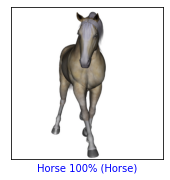

In [21]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(78, predictions, labels, images)
plt.show()

In [34]:
def predict_image(predict_img):
  
  img=cv2.imread (predict_img)
  img=img/255
  img=cv2.resize(img, (300,300))
  img=np.expand_dims(img, axis=0)

  pred=model.predict(img)

  index=np.argmax(pred)
  img_class=class_names[index]

  img=plt.imread (predict_img)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = img_class
  plt.xlabel("{}".format(predicted_label))

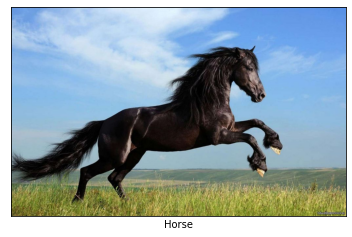

In [35]:
predict_image('horse.jpg')